# Lotka Volterra equations

In [1]:
import uncertainpy as un
import chaospy as cp #STUPID PACKAGE

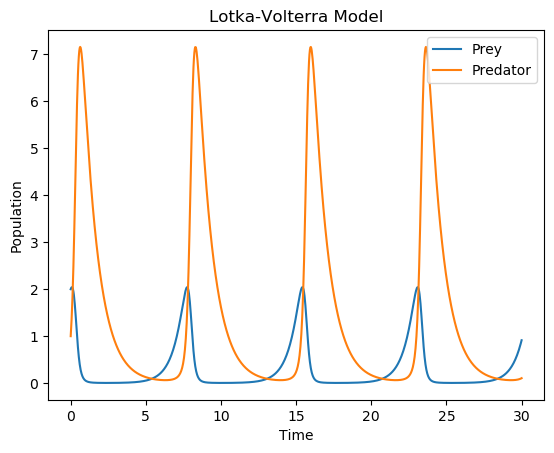

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# x is the prey population,
# y is the predator population, 
# t is time.

#a: The intrinsic growth rate of the prey population in the absence of predation. 
#This represents the rate at which the prey population would increase if there were no predators.

#b: The predation rate coefficient, which determines how quickly the predators consume the prey. 
#This represents the rate at which the predator population grows as a result of consuming the prey.

#c: The conversion efficiency of prey biomass into predator biomass. 
#This represents the proportion of consumed prey biomass that is converted into predator biomass.

#d: The intrinsic mortality rate of the predator population in the absence of prey. 
#This represents the rate at which the predator population would decline if there were no prey.

#The Lotka-Volterra model assumes that the prey population grows exponentially in the absence of predation, 
#but is limited by the availability of resources such as food, water, and shelter. 
#The predator population, on the other hand, grows as a result of consuming the prey, but declines in the absence of prey to consume. The model assumes that the predator-prey interaction is a simple two-species system, without taking into account other factors that could influence the populations, such as competition or environmental factors.

#The values of the parameters a, b, c, and d determine the behavior of the model. For example, if the predation rate (b) is very high, the predator population may grow rapidly and consume the prey population to extinction. Conversely, if the conversion efficiency (c) is low, the predator population may struggle to maintain itself even if there is plenty of prey available.

#In summary, the growth and interaction rates in the Lotka-Volterra model describe the ways in which the populations of prey and predators interact with each other, and determine the behavior of the system over time.

def LotkavolterraM(a=1.5,b=1,c=3,d=1):
    
    def lotka_volterra(y, t, a, b, c, d):
        x, y = y
        dxdt = a*x - b*x*y
        dydt = c*x*y - d*y
        return [dxdt, dydt]

    # Define the simulation time and initial conditions
    t = np.linspace(0, 30, 1000)
    y0 = [2, 1]

    # Define the time points to solve the equations at
    t_span = [0, 10]
    t_eval = np.linspace(t_span[0], t_span[1], 1000)
    
    # Solve the differential equations numerically using odeint
    sol = odeint(lotka_volterra, y0, t, args=(a, b, c, d))

    # Extract the predator and prey populations from the simulation results
    prey = sol[:, 0]
    predator = sol[:, 1]
    
    #CRAZY STUPID TRICK
    info = {"predators": predator}


    # Solve the Lotka-Volterra equations using the solve_ivp function from scipy.integrate
    return t, prey, predator, info

t, preys, predators, info=LotkavolterraM()

plt.plot(t, preys, label='Prey')
plt.plot(t, predators, label='Predator')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Lotka-Volterra Model')
plt.legend()
plt.show()



In [3]:
model = un.Model(run=LotkavolterraM,
                 labels=["Time (ms)", "Membrane potential (mV)"])

In [4]:

# Define a parameter dictionary
parameters = {"a": -1,
              "b": 1,
              "c": 1,
              "d": 2}
# Create the parameters
parameters = un.Parameters(parameters)
parameters.set_all_distributions(un.uniform(0.2))

In [6]:
UQ = un.UncertaintyQuantification(model,parameters=parameters)

# Il momento della verità

In [7]:
#In teoria ora dovrebbe funzionare solo per le prede
%timeit

# We set the seed to easier be able to reproduce the result
data = UQ.quantify(seed=10, method="mc")

/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/SALib/sample/saltelli.py:94: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (5000) is equal to `2^n`.
        
  warnings.warn(msg)
Running model: 100%|██████████| 30000/30000 [00:21<00:00, 1410.28it/s]
/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/SALib/analyze/sobol.py:161: RuntimeWarning: invalid value encountered in divide
  return np.mean(B * (AB - A), axis=0) / np.var(np.r_[A, B], axis=0)
/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/SALib/analyze/sobol.py:169: RuntimeWarning: invalid value encountered in divide
  return 0.5 * np.mean((A - AB) ** 2, axis=0) / np.var(np.r_[A, B], axis=0)


Saving data as: data/LotkavolterraM.h5


# Proviamo il modello a due outputs

In [8]:
#Using the suggested crazy stupid trick
def predators(time, preys, info):
    return time, info["predators"]

feature_list = [predators]

# Define the parameter dictionary
#parameters = {"a": cp.Uniform(0.2)}

In [9]:
UQ2 = un.UncertaintyQuantification( model=model,
                                    parameters=parameters,
                                    features=feature_list) #feature_list tells me the output is the second

In [10]:
%timeit

# Perform the uncertainty quantification using
# polynomial chaos with point collocation (by default)
data2 = UQ2.quantify(seed=10, method="mc")

/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/SALib/sample/saltelli.py:94: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (5000) is equal to `2^n`.
        
  warnings.warn(msg)
libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file
libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file


libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file
Running model:   0%|          | 0/30000 [00:00<?, ?it/s]

Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

Running model:   0%|          | 0/30000 [00:00<?, ?it/s]




Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:
Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:


libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file


libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:






libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file


Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):


libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file
Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*m

TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file


libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')











Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:



Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:
Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:





libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file



Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:===================================================================


Traceback (most recent call last):


Traceback (most recent call last):
libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file
Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
Traceback (most recent call last):
Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/para

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "/Users/fl.hi1/o

libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file




Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:
Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:===================================================================
Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:




libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file


Traceback (most recent call last):




Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:===================================================================

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
Traceback (most recent call last):


Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  

TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')





Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:===================================================================

Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:




Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:


libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')

Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:
Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:



Traceback (most recent call last):


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


Traceback (most recent call last):


Traceback (most recent call last):


Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/env

Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in cal

TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')











Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:




===================================================================Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:
Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:======================================================================================================================================





libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file


Traceback (most recent call last):


Traceback (most recent call last):


Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file




Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:



===================================================================Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:



Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:===================================================================

Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

Traceback (most recent call last):


Traceback (most recent call last):


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
Traceback (most recent call last):
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
Traceback (most recent call last):
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')




Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:===================================================================



Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:
Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:


Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
Traceback (most recent call last):


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


Traceback (most recent call last):
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:===================================================================



libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)




Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:===================================================================

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)



Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:



  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


Traceback (most recent call last):


Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

Traceback (most recent call last):
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)




Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
Traceback (most recent call last):
libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:



  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


Traceback (most recent call last):


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


Traceback (most recent call last):
Traceback (most recent call last):


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


Traceback (most recent call last):


Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)



Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
Traceback (most recent call last):
libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)



===================================================================Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)



Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


Traceback (most recent call last):
Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


Traceback (most recent call last):


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


Traceback (most recent call last):


===================================================================Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)



Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

Traceback (most recent call last):
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
Traceback (most recent call last):


===================================================================Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


===================================================================Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:===================================================================

Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
Traceback (most recent call last):
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:===================================================================




TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')




===================================================================Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:===================================================================

Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:



Traceback (most recent call last):





Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
Traceback (most recent call last):


===================================================================Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


Traceback (most recent call last):


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)



Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file


Traceback (most recent call last):



===================================================================Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)



Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:===================================================================

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')




Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:===================================================================Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:===================================================================

Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:



  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


Traceback (most recent call last):


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predat

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')




Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:





Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:



Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:===================================================================

Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:===================================================================


Traceback (most recent call last):


Traceback (most recent call last):


Traceback (most recent call last):


Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = ge

TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')






Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:





Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:


===================================================================Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

Traceback (most recent call last):


libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')



Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:===================================================================

Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:


Traceback (most recent call last):



Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


Traceback (most recent call last):
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)



Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')



Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')









Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:






Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:
Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file
Traceback (most recent call last):


Traceback (most recent call last):


Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.

Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
TypeError: ('predators() takes 3 positional arguments but 4 w

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:
Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:




TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


=========================================================================================================================================================================================================Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:





libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file


Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_

Traceback (most recent call last):





Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:




  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)



======================================================================================================================================Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:
Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


===================================================================Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:


Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
TypeError: ('predators() takes 3 positional argumen

TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
Traceback (most recent call last):


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)



Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


===================================================================Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:


Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


Traceback (most recent call last):


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)



Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:===================================================================

TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file


Traceback (most recent call last):



Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)



Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')





Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:===================================================================



Traceback (most recent call last):


Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:===================================================================

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:===================================================================

Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:======================================================================================================================================


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:


libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
Traceback (most recent call last):


Traceback (most recent call last):


Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:



  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:
Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')



Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:======================================================================================================================================






Traceback (most recent call last):


Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')
Traceback (most recent call last):


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:===================================================================





Traceback (most recent call last):


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)



Caught exception when calculating/postprocessing features of model: LotkavolterraM in parallel:

Traceback (most recent call last):
  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/core/parallel.py", line 328, in run
    feature_results = self.features.calculate_features(*model_result)
TypeError: ('predators() takes 3 positional arguments but 4 were given', 'Error when calculating: predators')


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 371, in calculate_feature
    feature_result = getattr(self, feature_name)(*preprocess_results)


  File "/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/uncertainpy/features/features.py", line 481, in calculate_features
    time_feature, values_feature = self.calculate_feature(feature, *preprocess_results)
